In [1]:
import sounddevice as sd
import soundfile as sf
import numpy as np
import scipy
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt


### Representación del audio en el dominio del tiempo.

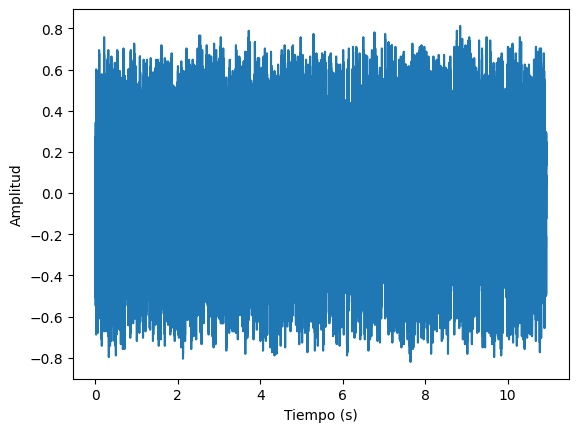

525183 Cantidad de muestras 525183
48000 Frecuencia de muestreo de 48000 Hz


In [2]:

data, fs = sf.read('signal_disturbed.wav')

Ts = 1/fs

tam = np.size(data)
t = np.arange(0, tam*Ts,Ts)

plt.plot(t,data)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

print(len(data), 'Cantidad de muestras 525183') #Cantidad de muestras 525183
print(fs, 'Frecuencia de muestreo de 48000 Hz') #Frecuencia de muestreo de 48000 Hz


### Señal de audio en el dominio de la frecuencia haciendo uso de la TF de Fourier

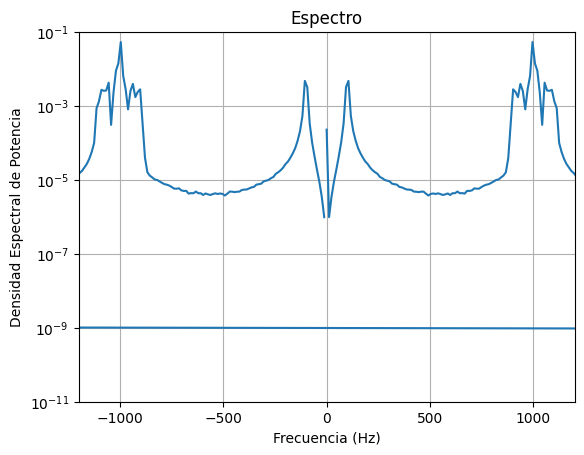

In [3]:
N=4096
X=fft(data,N)/(N/2)

freq=fftfreq(N,Ts)
Sx = (np.abs(X))**2

plt.semilogy(freq,Sx.real)
plt.ylim(10e-12,10e-2)
plt.xlim(-1200,1200)
plt.grid()
plt.title("Espectro")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia")
plt.show()

### Creación del filtro Pasabajas

In [4]:
fcorte = 500
fcorte_rad = 2*np.pi*500
orden = 10

sos = scipy.signal.butter(orden,fcorte,'lowpass',fs=fs,output='sos')
y = signal.sosfilt(sos, data)
Y = fft(y,N)/(N/2)
Sx = 10*np.log10((np.abs(Y))**2)

b,a=scipy.signal.butter(orden,fcorte_rad,'lowpass',True,output='ba')
sys=signal.TransferFunction(b,a)
w,mag,fase=signal.bode(sys)
fr=w/(2*np.pi)

### Frecuencia a filtrar, f = 2930 Hz

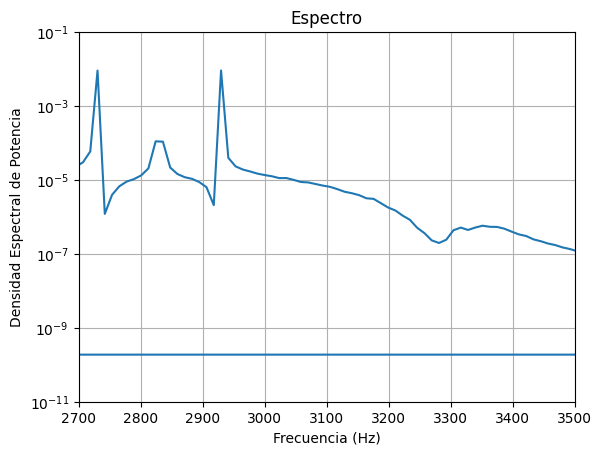

In [6]:
f = 2830 #Se desplaza los 100Hz a 2930 Hz a partir de y que es la señal filtrada
SeñalPortadora = np.exp(2*np.pi*f*t*1j)
x = y*SeñalPortadora
#plt.plot(t,x)
#plt.xlim(0,30*(1/2930))
N=4096
X=fft(x,N)/(N/2)

freq=fftfreq(N,Ts)
Sx = (np.abs(X))**2

plt.semilogy(freq,Sx.real)
plt.ylim(10e-12,10e-2)
plt.xlim(2700,3500)
plt.grid()
plt.title("Espectro")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia")
plt.show()

In [7]:
sd.play(x.real,fs)

In [8]:
fcorte = [2900,2960]
fcorte_rad = [2*np.pi*2900, 2*np.pi*2960]
orden = 20

sos = scipy.signal.butter(orden,fcorte,'bandpass',fs=fs,output='sos')
y = signal.sosfilt(sos, x)
Y = fft(y,N)/(N/2)
Sx = 10*np.log10((np.abs(Y))**2)

b,a=scipy.signal.butter(orden,fcorte_rad,'bandpass',True,output='ba')
sys=signal.TransferFunction(b,a)
w,mag,fase=signal.bode(sys)
fr=w/(2*np.pi)

### Diagrama de Bode - Respuesta en frecuencia del filtro Pasabanda.

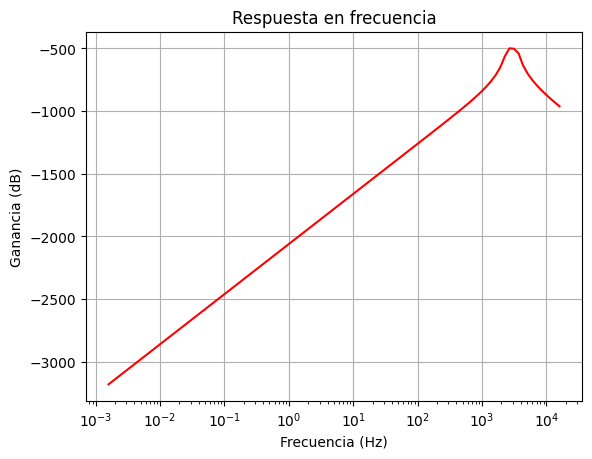

In [9]:
plt.semilogx(fr,mag,'r')
#plt.ylim(-500,-10)
#plt.xlim(10e2,10e4)
plt.grid()
plt.title("Respuesta en frecuencia") 
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Ganancia (dB)")
plt.show()

### Diagrama de Bode - Fase

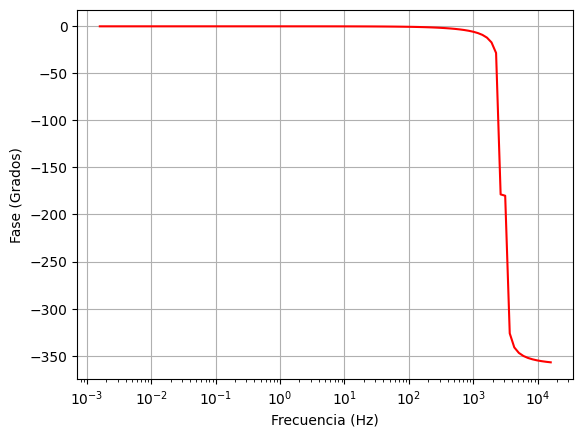

In [ ]:
plt.semilogx(fr,fase,'r')
plt.grid()
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (Grados)")
plt.show()

### Señal filtrada en el dominio de la frecuencia

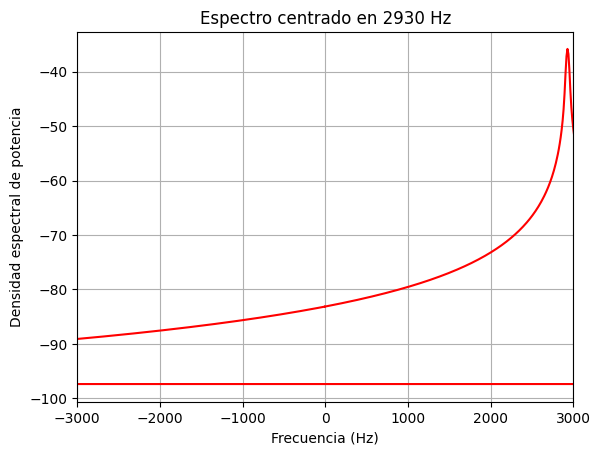

In [ ]:
plt.plot(freq, Sx, 'r')
plt.xlim(-3000,3000)
plt.title("Espectro centrado en 2930 Hz")
plt.ylabel('Densidad espectral de potencia')
plt.xlabel("Frecuencia (Hz)")
plt.grid()

In [ ]:
sd.play(y.real, fs)